<h1>Exploring Logistic Regression</h1>

Text(0, 0.5, 'sigmoid(x)')

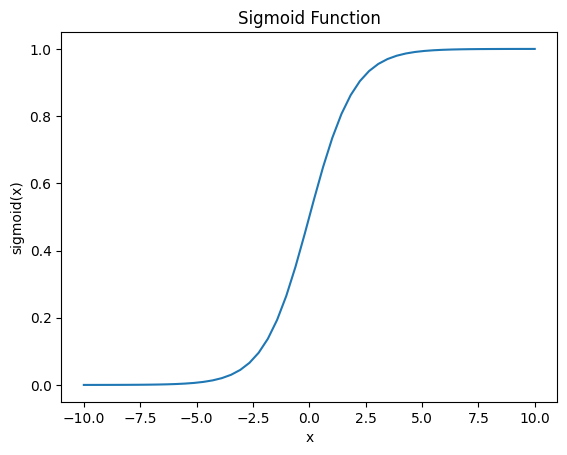

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.linspace(-10,10,50)

def sigmoid(z):
    return 1/(1+np.exp(-z))

plt.plot(x,sigmoid(x))
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')


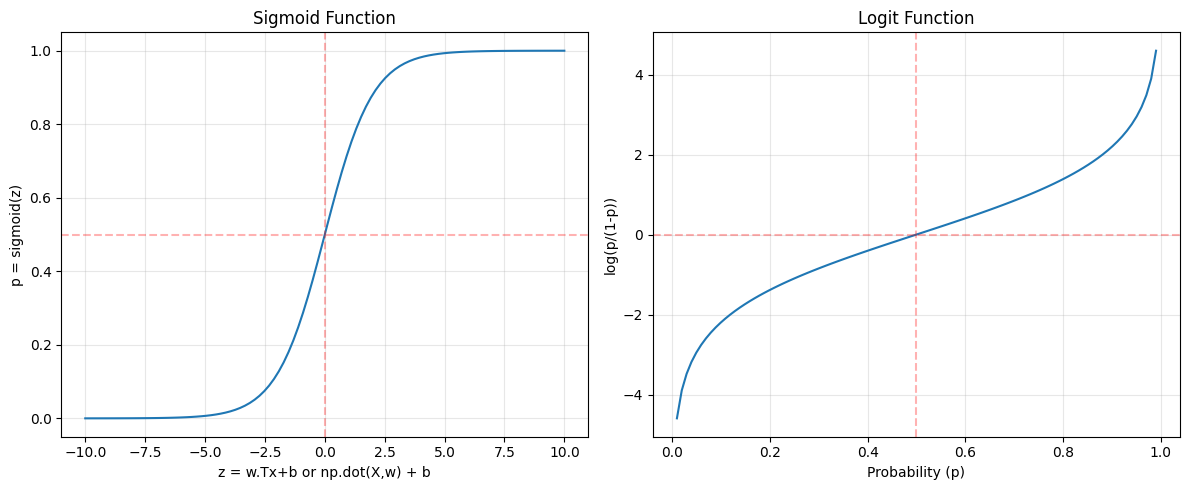

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Sigmoid function
x = np.linspace(-10, 10, 100)
sigmoid = 1/(1+np.exp(-x))

ax1.plot(x, sigmoid)
ax1.set_title('Sigmoid Function')
ax1.set_xlabel('z = w.Tx+b or np.dot(X,w) + b')
ax1.set_ylabel('p = sigmoid(z)')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
ax1.axvline(x=0, color='r', linestyle='--', alpha=0.3)

# Plot 2: Logit function 
p = np.linspace(0.01, 0.99, 100) 
logit = np.log(p/(1-p))

ax2.plot(p, logit)
ax2.set_title('Logit Function')
ax2.set_xlabel('Probability (p)')
ax2.set_ylabel('log(p/(1-p))')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.3)
ax2.axvline(x=0.5, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

<h1>Visualize the Loss of classifying a single training point</h1>

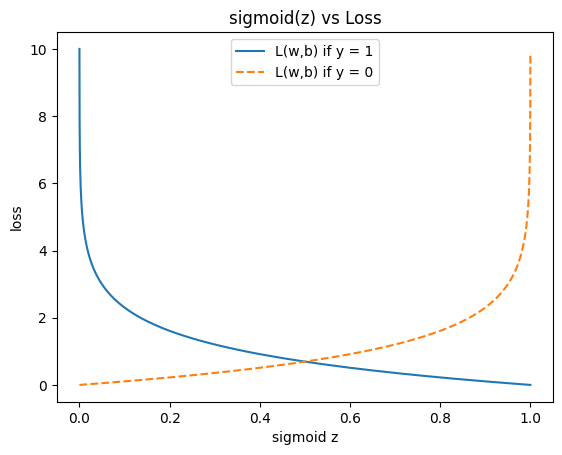

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

def loss_1(z):
    return (-1 * np.log(sigmoid(z)))
def loss_2(z):
    return (-1*np.log(1-sigmoid(z)))

z_vals = np.arange(-10,10,0.1)

#v1 values for loss1
#v2 values for loss2
sigmoid_z = sigmoid(z_vals)
v1 = [loss_1(z) for z in z_vals]
v2 = [loss_2(z) for z in z_vals]

plt.plot(sigmoid_z,v1,label = 'L(w,b) if y = 1')
plt.plot(sigmoid_z,v2,label = 'L(w,b) if y = 0',linestyle = '--')
plt.title('sigmoid(z) vs Loss')
plt.xlabel('sigmoid z')
plt.ylabel('loss')
plt.legend(loc = 'best')
plt.show()

